### Step 1: Loading the data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('../data/Churn_Modelling.csv')

### Step 2: Visualizing the data

In [5]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [7]:
data.corr()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,1.000000,0.004202,0.005840,0.000783,-0.006495,-0.009067,0.007246,0.000599,0.012044,-0.005988,-0.016571
CustomerId,0.004202,1.000000,0.005308,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
CreditScore,0.005840,0.005308,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,0.000783,0.009497,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,-0.006495,-0.014883,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,-0.009067,-0.012419,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.007246,0.016972,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,0.000599,-0.014025,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.012044,0.001665,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.005988,0.015271,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097


In [9]:
# Labels? (Total number of positive cases)
data['Exited'].sum()

2037

In [11]:
# Number and names of categorical entries
print("Surname:")
print(data['Surname'].nunique())
print(data['Surname'].unique())
print()
print("Geography:")
print(data['Geography'].nunique())
print(data['Geography'].unique())
print()
print("Gender:")
print(data['Gender'].nunique())
print(data['Gender'].unique())

Surname:
2932
['Hargrave' 'Hill' 'Onio' ... 'Kashiwagi' 'Aldridge' 'Burbidge']

Geography:
3
['France' 'Spain' 'Germany']

Gender:
2
['Female' 'Male']


### Step 3: Data transformation (make everything numerical)

In [8]:
! pip install sklearn

     |████████████████████████████████| 7.0MB 2.5MB/s eta 0:00:01     |███████████████████████▊        | 5.2MB 1.5MB/s eta 0:00:02     |█████████████████████████▍      | 5.6MB 1.5MB/s eta 0:00:01
     |████████████████████████████████| 296kB 9.8MB/s eta 0:00:01
     |████████████████████████████████| 26.1MB 2.4MB/s eta 0:00:01    |██▏                             | 1.7MB 1.9MB/s eta 0:00:13     |████████████████                | 13.0MB 7.1MB/s eta 0:00:02
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1316 sha256=d756263839ee983a10d18389a860e50ad28a645d6fe7578941c46957a3fdd4b3
  Stored in directory: /root/.cache/pip/wheels/76/03/bb/589d421d27431bcd2c6da284d5f2286c8e3b2ea3cf1594c074
Successfully built sklearn


In [14]:
"""
    - Skipping first three features: RowNumber, CustomerId, Surname.
    - Converting pandas dataframe to numpy array using .values
"""
X = data.iloc[:,3:13].values
Y = data.iloc[:,13].values

In [16]:
X[0]

array([619, 'France', 'Female', 42, 2, 0.0, 1, 1, 1, 101348.88],
      dtype=object)

In [5]:
X[0].shape

(10,)

In [6]:
np.unique(X[:, 1])

array(['France', 'Germany', 'Spain'], dtype=object)

In [17]:
# Encode catagorical variables in col 2 and 3.
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

country_encoder = LabelEncoder()
X[:, 1] = country_encoder.fit_transform(X[:, 1])

gender_encoder = LabelEncoder()
X[:, 2] = gender_encoder.fit_transform(X[:, 2])

In [18]:
X[0]

array([619, 0, 0, 42, 2, 0.0, 1, 1, 1, 101348.88], dtype=object)

In [19]:
X[0].shape

(10,)

In [20]:
from sklearn.compose import ColumnTransformer

transformer = ColumnTransformer(
    transformers=[
        ("OneHot",        # Just a name
         OneHotEncoder(), # The transformer class
         [1]              # The column(s) to be applied on.
         )
    ],
    remainder='passthrough' # donot apply anything to the remaining columns
)
X = transformer.fit_transform(X.tolist())
X = X[:, 1:]

In [21]:
X[0].shape

(11,)

In [22]:
X[0]

array([0.0, 0.0, 619, 0, 42, 2, 0.0, 1, 1, 1, 101348.88], dtype=object)

In [65]:
np.unique(X[:, 1])
# Ques: is this correct, changing three classes to two?
# Ques: What is one-hot encoding?

array([0.0, 1.0], dtype=object)

### Step 4: Split train and test datasets

In [51]:
# Splitting the dataset into the Training set and Test set

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)


### Step 5: Feature scaling

In [52]:
### Bringing all the features to same scale
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

## Implementation 1: Using sklearn

### Step 6: Create the model

In [53]:
from sklearn.linear_model import LogisticRegression

In [54]:
# all parameters not specified are set to their defaults
logisticRegr = LogisticRegression()

### Step 7: Training the model on data

In [55]:
x_train.shape

(8000, 11)

In [56]:
logisticRegr.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### Step 8: Predict labels on trained model

In [57]:
logisticRegr.predict(x_test[0:10])

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 1])

In [58]:
y_test[0:10]

array([0, 1, 0, 0, 0, 1, 0, 0, 1, 1])

In [59]:
predictions = logisticRegr.predict(x_test)

### Step 9: Performance metrics for model

In [60]:
# Accuracy
score = logisticRegr.score(x_test, y_test)
score

0.811

**Confusion matrix**

In [61]:
from sklearn import metrics

In [76]:
cm = metrics.confusion_matrix(y_test, predictions)

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, accuracy):
    plt.figure(figsize=(9,9))
    sns.heatmap(cm, annot=True, fmt='.3f', linewidths=.5, square=True, cmap='Blues_r')
    plt.xlabel('Predicted value')
    plt.ylabel('Actual value')
    header = f'Accuracy:{accuracy}'
    plt.title(header)

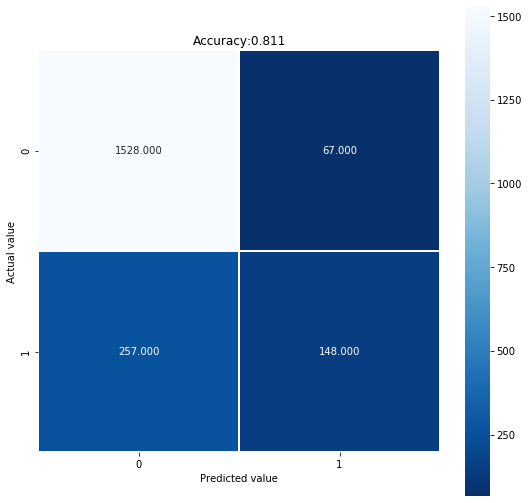

In [82]:
plot_confusion_matrix(cm, score)

## Implementation 2: Using Keras

In [24]:
! pip install keras
! pip install tensorflow

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


In [25]:
X.shape

(10000, 12)

In [99]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense

# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 11))

# Adding the second hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))

# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
history = classifier.fit(x_train, y_train, batch_size = 10, epochs = 100)


Epoch 1/100
8000/8000 [==============================] - 1s 147us/step - loss: 0.4838 - accuracy: 0.7958
Epoch 2/100
8000/8000 [==============================] - 1s 126us/step - loss: 0.4293 - accuracy: 0.7960
Epoch 3/100
8000/8000 [==============================] - 1s 142us/step - loss: 0.4241 - accuracy: 0.7960
Epoch 4/100
8000/8000 [==============================] - 1s 143us/step - loss: 0.4198 - accuracy: 0.8171
Epoch 5/100
8000/8000 [==============================] - 1s 133us/step - loss: 0.4169 - accuracy: 0.8250
Epoch 6/100
8000/8000 [==============================] - 1s 141us/step - loss: 0.4148 - accuracy: 0.8282
Epoch 7/100
8000/8000 [==============================] - 1s 124us/step - loss: 0.4140 - accuracy: 0.8278
Epoch 8/100
8000/8000 [==============================] - 1s 148us/step - loss: 0.4123 - accuracy: 0.8299
Epoch 9/100
8000/8000 [==============================] - 1s 130us/step - loss: 0.4112 - accuracy: 0.8320
Epoch 10/100
8000/8000 [==============================]

In [112]:
acc_hist = history.history['accuracy']
accuracy = round(sum(acc_hist)/len(acc_hist), 4)
accuracy

0.8328

In [66]:
# Predicting the Test set results
y_pred = classifier.predict(x_test)
y_pred = (y_pred > 0.5)

In [83]:
# Making the Confusion Matrix
cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)

[[1528   67]
 [ 257  148]]


In [84]:
# Calculating accuracy
accuracy = (cm[0][0] + cm[1][1])/cm.sum()

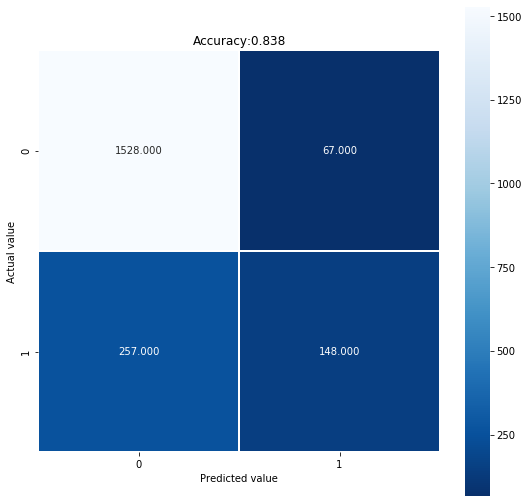

In [85]:
plot_confusion_matrix(cm, accuracy)

In [74]:
# Predicting a single new observation
"""Predict if the customer with the following informations will leave the bank:
Geography: France
Credit Score: 600
Gender: Male
Age: 40
Tenure: 3
Balance: 60000
Number of Products: 2
Has Credit Card: Yes
Is Active Member: Yes
Estimated Salary: 50000"""
new_prediction = classifier.predict(sc.transform(np.array([[0.0, 0, 600, 1, 40, 3, 60000, 2, 1, 1, 50000]])))
new_prediction = (new_prediction > 0.5)
print(new_prediction)

[[False]]


Questions to answer:
1. What is one-hot encoding?
2. How does ML logistic regression work?
3. In deep learning implementations:
    - Explain binary_crossentropy
    - Explain adam optimizer
    - Relu function
    - Sigmoid function
    - Difference between model.compile() and model.fit()

## Implementation 2: Using Pytorch

### Preparing the data

In [12]:
dataset_df = data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)
dataset_df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [13]:
# Now, the categorical values (Geography, Gender) should be converted into dummy variables.
dataset_df = pd.get_dummies(dataset_df)
dataset_df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0


In [14]:
# With all data converted to numerical values, it's time to put them into a matrix!
features = np.array(dataset_df.drop('Exited', axis=1))
feature_names = dataset_df.drop('Exited', axis=1).columns.tolist()
labels = np.array(dataset_df['Exited'])
features, feature_names, labels

(array([[619.,  42.,   2., ...,   0.,   1.,   0.],
        [608.,  41.,   1., ...,   1.,   1.,   0.],
        [502.,  42.,   8., ...,   0.,   1.,   0.],
        ...,
        [709.,  36.,   7., ...,   0.,   1.,   0.],
        [772.,  42.,   3., ...,   0.,   0.,   1.],
        [792.,  28.,   4., ...,   0.,   1.,   0.]]),
 ['CreditScore',
  'Age',
  'Tenure',
  'Balance',
  'NumOfProducts',
  'HasCrCard',
  'IsActiveMember',
  'EstimatedSalary',
  'Geography_France',
  'Geography_Germany',
  'Geography_Spain',
  'Gender_Female',
  'Gender_Male'],
 array([1, 0, 1, ..., 1, 1, 0]))

In [15]:
# Since the range of values are inconsistent over different features, it should be normalized.
features = (features - features.mean(axis=0, keepdims=True)) / features.std(axis=0, keepdims=True)
features

array([[-0.32622142,  0.29351742, -1.04175968, ..., -0.57380915,
         1.09598752, -1.09598752],
       [-0.44003595,  0.19816383, -1.38753759, ...,  1.74273971,
         1.09598752, -1.09598752],
       [-1.53679418,  0.29351742,  1.03290776, ..., -0.57380915,
         1.09598752, -1.09598752],
       ...,
       [ 0.60498839, -0.27860412,  0.68712986, ..., -0.57380915,
         1.09598752, -1.09598752],
       [ 1.25683526,  0.29351742, -0.69598177, ..., -0.57380915,
        -0.91241915,  0.91241915],
       [ 1.46377078, -1.04143285, -0.35020386, ..., -0.57380915,
         1.09598752, -1.09598752]])

### Moving on to PyTorch!

In [22]:
! pip install torch --user

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
     |████████████████████████████████| 753.4 MB 13.7 MB/s eta 0:00:01  |▎                               | 7.0 MB 1.3 MB/s eta 0:09:39     |▎                               | 7.2 MB 1.3 MB/s eta 0:09:39     |▌                               | 10.6 MB 1.3 MB/s eta 0:09:26     |▌                               | 12.0 MB 1.3 MB/s eta 0:09:25     |▋                               | 15.4 MB 1.3 MB/s eta 0:09:22     |▉                               | 19.0 MB 1.3 MB/s eta 0:09:19[K     |█                               | 26.0 MB 2.4 MB/s eta 0:05:02     |█▋                              | 37.0 MB 5.4 MB/s eta 0:02:13     |██▏                             | 51.6 MB 2.3 MB/s eta 0:05:03     |██▊                             | 64.2 MB 4.7 MB/s eta 0:02:28     |███                             | 71.5 MB 3.6 MB/s eta 0:03:09

In [23]:
! pip install torchvision --user

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
  Using cached torchvision-0.5.0-cp37-cp37m-manylinux1_x86_64.whl (4.0 MB)
     |████████████████████████████████| 753.4 MB 11.9 MB/s eta 0:00:01  |▏                               | 3.2 MB 2.8 MB/s eta 0:04:28     |▊                               | 16.1 MB 16.2 MB/s eta 0:00:46     |▊                               | 17.3 MB 16.2 MB/s eta 0:00:46     |█▊                              | 40.6 MB 27.5 MB/s eta 0:00:26     |██▍                             | 55.3 MB 8.9 MB/s eta 0:01:19     |██▊                             | 62.9 MB 3.2 MB/s eta 0:03:38     |██▉                             | 67.5 MB 3.2 MB/s eta 0:03:37     |███▉                            | 91.4 MB 6.5 MB/s eta 0:01:43     |████▏                           | 98.9 MB 6.5 MB/s eta 0:01:41     |████▍                           | 102.8 MB 20.4 MB/s 

In [24]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.nn.init as init
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, SubsetRandomSampler
from collections import OrderedDict

ModuleNotFoundError: No module named 'torch'